In [1]:
from requests import request

headers = {
    'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

In [2]:
url = 'https://pythonscraping.com/pages/page3.html'

resp = request('GET', url)

In [3]:
from bs4 import BeautifulSoup

dom = BeautifulSoup(resp.text, 'html5lib')

In [5]:
[node.name for node in dom.div.find_all(recursive=False)]
#                       document
#                       HTML
#               HEAD            BODY
#                               DIV
#                       IMG HI  DIV TABLE   P(*)    DIV

['img', 'h1', 'div', 'table', 'p', 'div']

In [13]:
import re
dom.find_all(text=re.compile('[$][0-9.,]{4,}'))[1]

/var/folders/s1/6z_vw3ln3nd621_2gd81gzr40000gn/T/ipykernel_15972/3358009517.py:2: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  dom.find_all(text=re.compile('[$][0-9.,]{4,}'))[1]


'\n$15.00\n'

In [12]:
import re
for node in dom.table.find_all(text=re.compile('[$][0-9.,]{4,}')):
    print(node.find_parent().find_next_sibling())

<td>
<img src="../img/gifts/img1.jpg"/>
</td>
<td>
<img src="../img/gifts/img2.jpg"/>
</td>
<td>
<img src="../img/gifts/img3.jpg"/>
</td>
<td>
<img src="../img/gifts/img4.jpg"/>
</td>
<td>
<img src="../img/gifts/img6.jpg"/>
</td>


/var/folders/s1/6z_vw3ln3nd621_2gd81gzr40000gn/T/ipykernel_15972/1947726336.py:2: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for node in dom.table.find_all(text=re.compile('[$][0-9.,]{4,}')):


In [14]:
dom.table.find_all(attrs={'src':re.compile('jpg$')})

[<img src="../img/gifts/img1.jpg"/>,
 <img src="../img/gifts/img2.jpg"/>,
 <img src="../img/gifts/img3.jpg"/>,
 <img src="../img/gifts/img4.jpg"/>,
 <img src="../img/gifts/img6.jpg"/>]

In [15]:
dom.find_all(text = re.compile(r'\b\b'))

/var/folders/s1/6z_vw3ln3nd621_2gd81gzr40000gn/T/ipykernel_15972/3274184523.py:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  dom.find_all(text = re.compile(r'\b\b'))


['\nimg{\n\twidth:75px;\n}\ntable{\n\twidth:50%;\n}\ntd{\n\tmargin:10px;\n\tpadding:10px;\n}\n.wrapper{\n\twidth:800px;\n}\n.excitingNote{\n\tfont-style:italic;\n\tfont-weight:bold;\n}\n',
 'Totally Normal Gifts',
 'Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is\nhand-curated by well-paid, free-range Tibetan monks.',
 "\nWe haven't figured out how to make online shopping carts yet, but you can send us a check to:",
 '\n123 Main St.',
 '\nAbuja, Nigeria\n',
 'We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.',
 '\nItem Title\n',
 '\nDescription\n',
 '\nCost\n',
 '\nImage\n',
 '\nVegetable Basket\n',
 '\nThis vegetable basket is the perfect gift for your health conscious (or overweight) friends!\n',
 'Now with super-colorful bell peppers!',
 '\n$15.00\n',
 '\nRussian Nesting Dolls\n',
 '\nHand-painted by trained monkeys, these exquisite dolls are priceless! And by "

In [16]:
url = 'https://www.google.com/search'

params = {
    'q' : '뉴진스'
}

resp = request('GET', url, params=params, headers=headers)

In [17]:
resp.status_code, re.search(r'text', resp.headers['content-type'])

(200, <re.Match object; span=(0, 4), match='text'>)

In [18]:
dom = BeautifulSoup(resp.content, 'html5lib')

<h3 class="LC20lb MBeuO DKV0Md">NewJeans - 나무위키</h3>
<script nonce="lZ8fkO2pI-eMtkD6CWes2Q">(function(){google.kEXPI='0,791104,1713193,1195912,104,636,363778,16311,68875,12036,39925,48073,66508,2403,6398,117167,76672,68135,23419,58148,19744,67422,18038,24908,66848,2305,1582,35972,21913,253,9413,3332,5798,3909,4150,7034,2370,355,22219,1533,9765,5202423,5927,826,431,5993515,2828706,7052,26717300,1315461,6985,441,25171709,2786,778,3658,95,1039,173,2801,1840,3783,3794,933,832,952,71,1136,801,3700,3222,554,64,102,1599,634,1040,927,2836,657,253,1142,204,16,176,252,305,336,128,8,166,198,1615,472,905,215,24,184,119,111,630,162,739,1829,17,59,299,745,240,386,214,1303';})();(function(){var u='/xjs/_/js/k\x3dxjs.s.ko.5V-Zi_cQqyo.O/am\x3dCgQBASAAIAoIhwA2gAB82hkAAIAAAQAAAACkRgAwACB4_5EAAAAAESAMBDHAAEBCCdgBAAAw9kMEGACAABgACgBAKAQAByGgAAgAAACA9ADMeQGCgwkLAAAAAAAAAAAggBIEgwukxxQEgAAAAAAAAAAAAKSSycsDIQAAGA/d\x3d1/ed\x3d1/dg\x3d2/br\x3d1/rs\x3dACT90oF7HH8ef76lflngg00J42_tUn1EwQ/ee\x3dcEt90b:ws9Tlc;qddgK
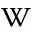

/var/folders/s1/6z_vw3ln3nd621_2gd81gzr40000gn/T/ipykernel_15972/3316169173.py:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for node in dom.find_all(text = re.compile('나무위키')):


In [19]:
for node in dom.find_all(text = re.compile('나무위키')):
    print(node.find_parent())

NewJeans - 나무위키
https://namu.wiki/w/NewJeans
<div class="yuRUbf"><a data-ved="2ahUKEwjdp8Ot9fj_AhWmmVYBHWzWBRsQFnoECBIQAQ" href="https://namu.wiki/w/NewJeans" jsaction="rcuQ6b:npT2md" jscontroller="M9mgyc" jsname="qOiK6e" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;opi=89978449&amp;url=https://namu.wiki/w/NewJeans&amp;ved=2ahUKEwjdp8Ot9fj_AhWmmVYBHWzWBRsQFnoECBIQAQ"><br/><h3 class="LC20lb MBeuO DKV0Md">NewJeans - 나무위키</h3><div class="TbwUpd NJjxre iUh30 apx8Vc ojE3Fb"><span class="H9lube"><div aria-hidden="true" class="eqA2re NjwKYd Vwoesf"></div></span><div><span class="VuuXrf">namu.wiki</span><div class="byrV5b"><cite class="apx8Vc qLRx3b tjvcx GvPZzd cHaqb" role="text" style="max-width:330px">https://namu.wiki<span class="apx8Vc dyjrff ob9lvb" role="text"> › NewJeans</span></cite></div></div></div></a><div class="B6fmyf byrV5b Mg1HEd"><div class="TbwUpd iUh30 apx8Vc ojE3Fb"><span class="H9lube"><div class="eqA2re NjwKYd" style="height:18px;width:18px"></div></span><div><span class=
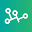
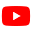
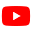
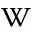
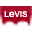

In [22]:
for node in dom.find_all(attrs={'class': 'LC20lb MBeuO DKV0Md'}):
    print(node.text)
    print(node.find_parent().attrs['href'])
    print(node.find_parent().find_parent())

In [23]:
for node in dom.find_all('div', attrs={'class' : 'yuRUbf'}):
    print(node.a.attrs['href'])

https://namu.wiki/w/NewJeans
https://www.youtube.com/@NewJeans_official
https://ko.wikipedia.org/wiki/NewJeans
https://www.levi.co.kr/%EB%89%B4%EC%A7%84%EC%8A%A4


In [24]:
url = 'https://search.daum.net/search'
params = {
    'w' : 'tot',
    'q' : '뉴진스'
}

resp = request('GET', url, params=params, headers=headers)

In [25]:
resp.status_code, resp.reason, resp.request.headers

(200,
 'OK',
 {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'})

In [26]:
dom = BeautifulSoup(resp.text, 'html5lib')

In [28]:
[node.find_parent().text for node in dom.find_all(text = re.compile('뉴진스'))]

/var/folders/s1/6z_vw3ln3nd621_2gd81gzr40000gn/T/ipykernel_15972/516463902.py:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  [node.find_parent().text for node in dom.find_all(text = re.compile('뉴진스'))]


['뉴진스 – Daum 검색',
 '',
 '뉴진스',
 '뉴진스 소속사',
 '뉴진스 멤버',
 '뉴진스 노래',
 '뉴진스 컴백',
 '뉴진스 하입보이',
 '뉴진스 하니',
 '뉴진스 해린',
 '뉴진스 민지',
 '뉴진스 뜻',
 '뉴진스 다니엘',
 '뉴진스 앨범',
 '뉴진스 디토',
 '뉴진스 eta',
 '뉴진스 나이',
 '뉴진스 빌보드',
 '뉴진스 omg',
 '뉴진스 하이브',
 '',
 '뉴진스',
 '뉴진스(NewJeans) - OMG | SBS 23...',
 'OMG - 뉴진스(NewJeans) | KBS 23...',
 'Ditto - 뉴진스(NewJeans) | KBS ...',
 '[2023 토끼의 해 특집] 뉴진스(NewJeans...',
 "NewJeans (뉴진스) 'INTRO+OMG' S...",
 '뉴진스 코드 in 부산',
 '',
 '뉴진스',
 '뉴진스 G마켓',
 '뉴진스',
 '옥션 뉴진스',
 '뉴진스',
 '쿠팡 뉴진스',
 '뉴진스',
 '쿠팡 뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스 혜린 프로필',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',
 '뉴진스',